In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# Новый раздел

In [2]:
data = pd.read_excel('/content/sample.xlsx')

In [3]:
data

,No,predictor 1,predictor 2,predictor 3,predictor 4,predictor 5,predictor 6,predictor 7,target
0,1,12423,710,441.5,5,4631.0,D4,B1,1
1,2,13983,1106,NaN,3,4256.0,D5,B1,1
2,3,15520,1276,391.5,1,4397.0,NaN,B1,0
3,4,29535,1106,NaN,1,3772.0,D4,B2,1
4,5,26154,976,315.0,5,2445.0,D3,B1,1
...,...,...,...,...,...,...,...,...,...
9995,9996,17220,1450,421.5,3,1759.0,D3,B2,0
9996,9997,6173,1100,NaN,1,4521.0,D5,B1,0
9997,9998,41944,1122,311.0,13,4087.0,D2,B2,0
9998,9999,28381,1314,182.0,1,4439.0,D1,B2,1


# Подготовка данных

In [4]:
data = data.rename(columns = {'predictor 1' : 'predictor_1',
                              'predictor 2' : 'predictor_2',
                              'predictor 3' : 'predictor_3',
                              'predictor 4' : 'predictor_4',
                              'predictor 5' : 'predictor_5',
                              'predictor 6' : 'predictor_6',
                              'predictor 7' : 'predictor_7'})

In [5]:
data.isnull().sum()

No                0
predictor_1       0
predictor_2       0
predictor_3    1913
predictor_4       0
predictor_5       0
predictor_6    1478
predictor_7       0
target            0
dtype: int64

In [6]:
data['predictor_6'].value_counts()

D1    1776
D4    1732
D5    1715
D3    1711
D2    1588
Name: predictor_6, dtype: int64

In [7]:
data.predictor_6.unique()

array(['D4', 'D5', nan, 'D3', 'D1', 'D2'], dtype=object)

In [8]:
one_hot = pd.get_dummies(data['predictor_6'])
data = data.drop('predictor_6', axis = 1)
data = data.join(one_hot)

In [9]:
data.predictor_7.unique()

array(['B1', 'B2'], dtype=object)

In [10]:
data['predictor_7'] = data.predictor_7.astype('category').cat.codes

In [11]:
prepared_data = data.fillna(data.mean())

In [13]:
prepared_data = prepared_data[['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4', 'predictor_5', 'predictor_7', 'D1', 'D2', 'D3', 'D4', 'D5', 'target']]

In [14]:
prepared_data.describe()

,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,predictor_7,D1,D2,D3,D4,D5,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,20107.924800,1123.810200,368.662174,3.490400,2518.598750,0.501100,0.177600,0.158800,0.171100,0.173200,0.171500,0.195500
std,12679.903068,146.337209,61.632859,3.827607,1447.114231,0.500024,0.382195,0.365508,0.376615,0.378439,0.376964,0.396605
min,7.000000,564.000000,62.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9651.250000,1050.000000,332.500000,1.000000,1261.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18850.000000,1106.000000,368.662174,3.000000,2536.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28010.500000,1214.000000,407.500000,5.000000,3765.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49996.000000,1450.000000,512.500000,49.000000,5000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,predictor_7,D1,D2,D3,D4,D5,target
predictor_1,1.000000,0.024318,0.001034,-0.012252,0.002024,0.009826,-0.007594,0.000600,0.014297,-0.001056,-0.002039,-0.007787
predictor_2,0.024318,1.000000,0.424633,-0.255252,-0.028135,-0.002997,0.002859,0.018824,-0.001915,-0.016526,-0.024378,-0.261663
predictor_3,0.001034,0.424633,1.000000,-0.236352,-0.009610,-0.004351,-0.015215,0.030234,-0.002342,-0.019191,-0.019509,-0.276486
predictor_4,-0.012252,-0.255252,-0.236352,1.000000,-0.014792,0.006511,-0.000338,-0.009919,0.012136,0.009571,0.011157,0.213800
predictor_5,0.002024,-0.028135,-0.009610,-0.014792,1.000000,-0.012786,-0.002871,-0.004844,0.006219,0.009384,-0.004621,0.006806
predictor_7,0.009826,-0.002997,-0.004351,0.006511,-0.012786,1.000000,0.029854,-0.003145,-0.037909,0.057658,-0.064406,0.014297
D1,-0.007594,0.002859,-0.015215,-0.000338,-0.002871,0.029854,1.000000,-0.201909,-0.211132,-0.212693,-0.211430,0.034171
D2,0.000600,0.018824,0.030234,-0.009919,-0.004844,-0.003145,-0.201909,1.000000,-0.197401,-0.198861,-0.197679,-0.095520
D3,0.014297,-0.001915,-0.002342,0.012136,0.006219,-0.037909,-0.211132,-0.197401,1.000000,-0.207945,-0.206709,0.020421
D4,-0.001056,-0.016526,-0.019191,0.009571,0.009384,0.057658,-0.212693,-0.198861,-0.207945,1.000000,-0.208238,0.058900


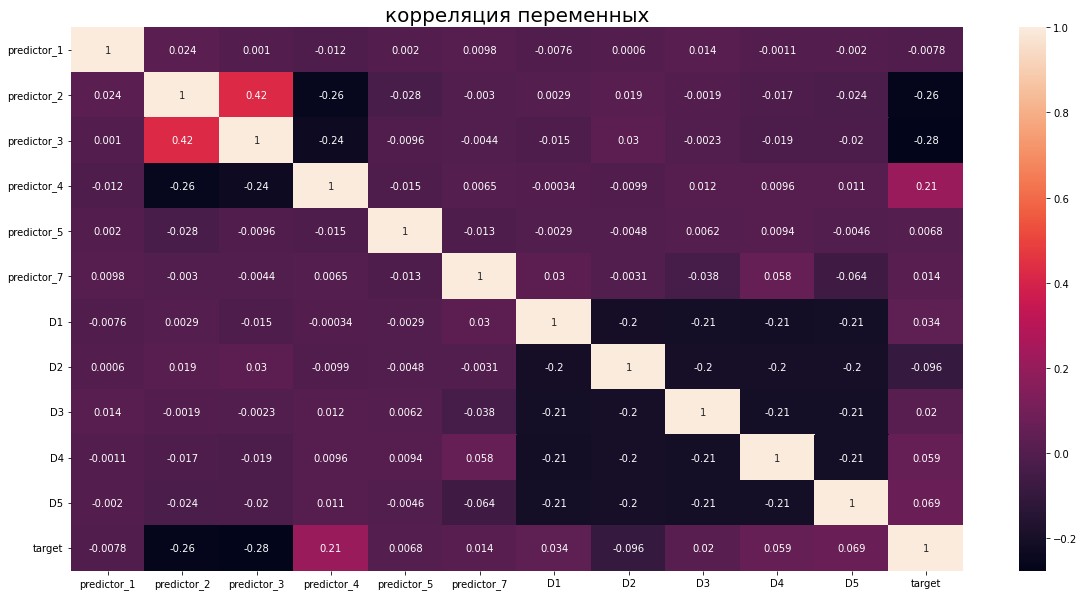

In [15]:
cor=prepared_data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("корреляция переменных", size=20)
cor

In [21]:
X = prepared_data.loc[:, 'predictor_1' : 'D5']
y = prepared_data['target']

In [22]:
y

0       1
1       1
2       0
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: target, Length: 10000, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [18]:
from sklearn.preprocessing import StandardScaler

In [25]:
std_scl = StandardScaler()
X_train_sc = std_scl.fit_transform(X_train)
X_test_sc = std_scl.fit_transform(X_test)

In [27]:
X_train_sc, X_test_sc

(array([[ 3.53796535e-01, -5.77532132e-01,  2.34102303e-01, ...,
         -4.46600133e-01, -4.59654467e-01, -4.55544873e-01],
        [ 1.42283049e+00,  1.77419302e+00,  1.26101523e-03, ...,
         -4.46600133e-01,  2.17554723e+00, -4.55544873e-01],
        [-7.20051261e-02, -1.12656229e-01,  1.30591925e+00, ...,
         -4.46600133e-01, -4.59654467e-01, -4.55544873e-01],
        ...,
        [-2.18692026e-01, -5.09168029e-01, -2.12488090e-01, ...,
         -4.46600133e-01, -4.59654467e-01,  2.19517343e+00],
        [ 9.68975126e-02, -1.12656229e-01,  3.55899683e-01, ...,
         -4.46600133e-01, -4.59654467e-01, -4.55544873e-01],
        [-1.39344769e+00,  6.53021729e-01,  8.18729726e-01, ...,
          2.23913950e+00, -4.59654467e-01, -4.55544873e-01]]),
 array([[ 1.62004611,  1.34611093,  1.59765797, ...,  2.11765453,
         -0.45310411, -0.45363838],
        [-1.24411436, -0.1428642 , -0.00293412, ..., -0.47222056,
         -0.45310411, -0.45363838],
        [-0.25050835,  1.

# Логистическая Регрессия

In [28]:
LogReg = LogisticRegression(random_state=1).fit(X_train_sc, y_train)

In [29]:
y_pred_train = LogReg.predict(X_train_sc)
y_predict_proba_train = LogReg.predict_proba(X_train_sc)[:,1]

In [30]:
LogReg.score(X_train_sc, y_train)

0.8135714285714286

In [31]:
y_pred = LogReg.predict(X_test_sc)
y_predict_proba = LogReg.predict_proba(X_test_sc)[:,1]

In [32]:
LogReg.score(X_test_sc, y_test)

0.813

# Дерево решений

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7336666666666667

# Дерево решений с глубиной 3


In [ ]:
clf_3 = DecisionTreeClassifier(max_depth=3)
clf_3 = clf_3.fit(X_train, y_train)

In [ ]:
y_pred_3 = clf_3.predict(X_test)
accuracy_score(y_test, y_pred_3)

0.808

# Дерево решений с глубиной 6


In [ ]:
clf_6 = DecisionTreeClassifier(max_depth=6)
clf_6 = clf_6.fit(X_train, y_train)
y_pred_6 = clf_6.predict(X_test)
accuracy_score(y_test, y_pred_6)

0.8096666666666666

# Дерево решений с глубиной 9


In [ ]:
clf_9 = DecisionTreeClassifier(max_depth=9)
clf_9 = clf_9.fit(X_train, y_train)
y_pred_9 = clf_9.predict(X_test)
accuracy_score(y_test, y_pred_9)

0.789

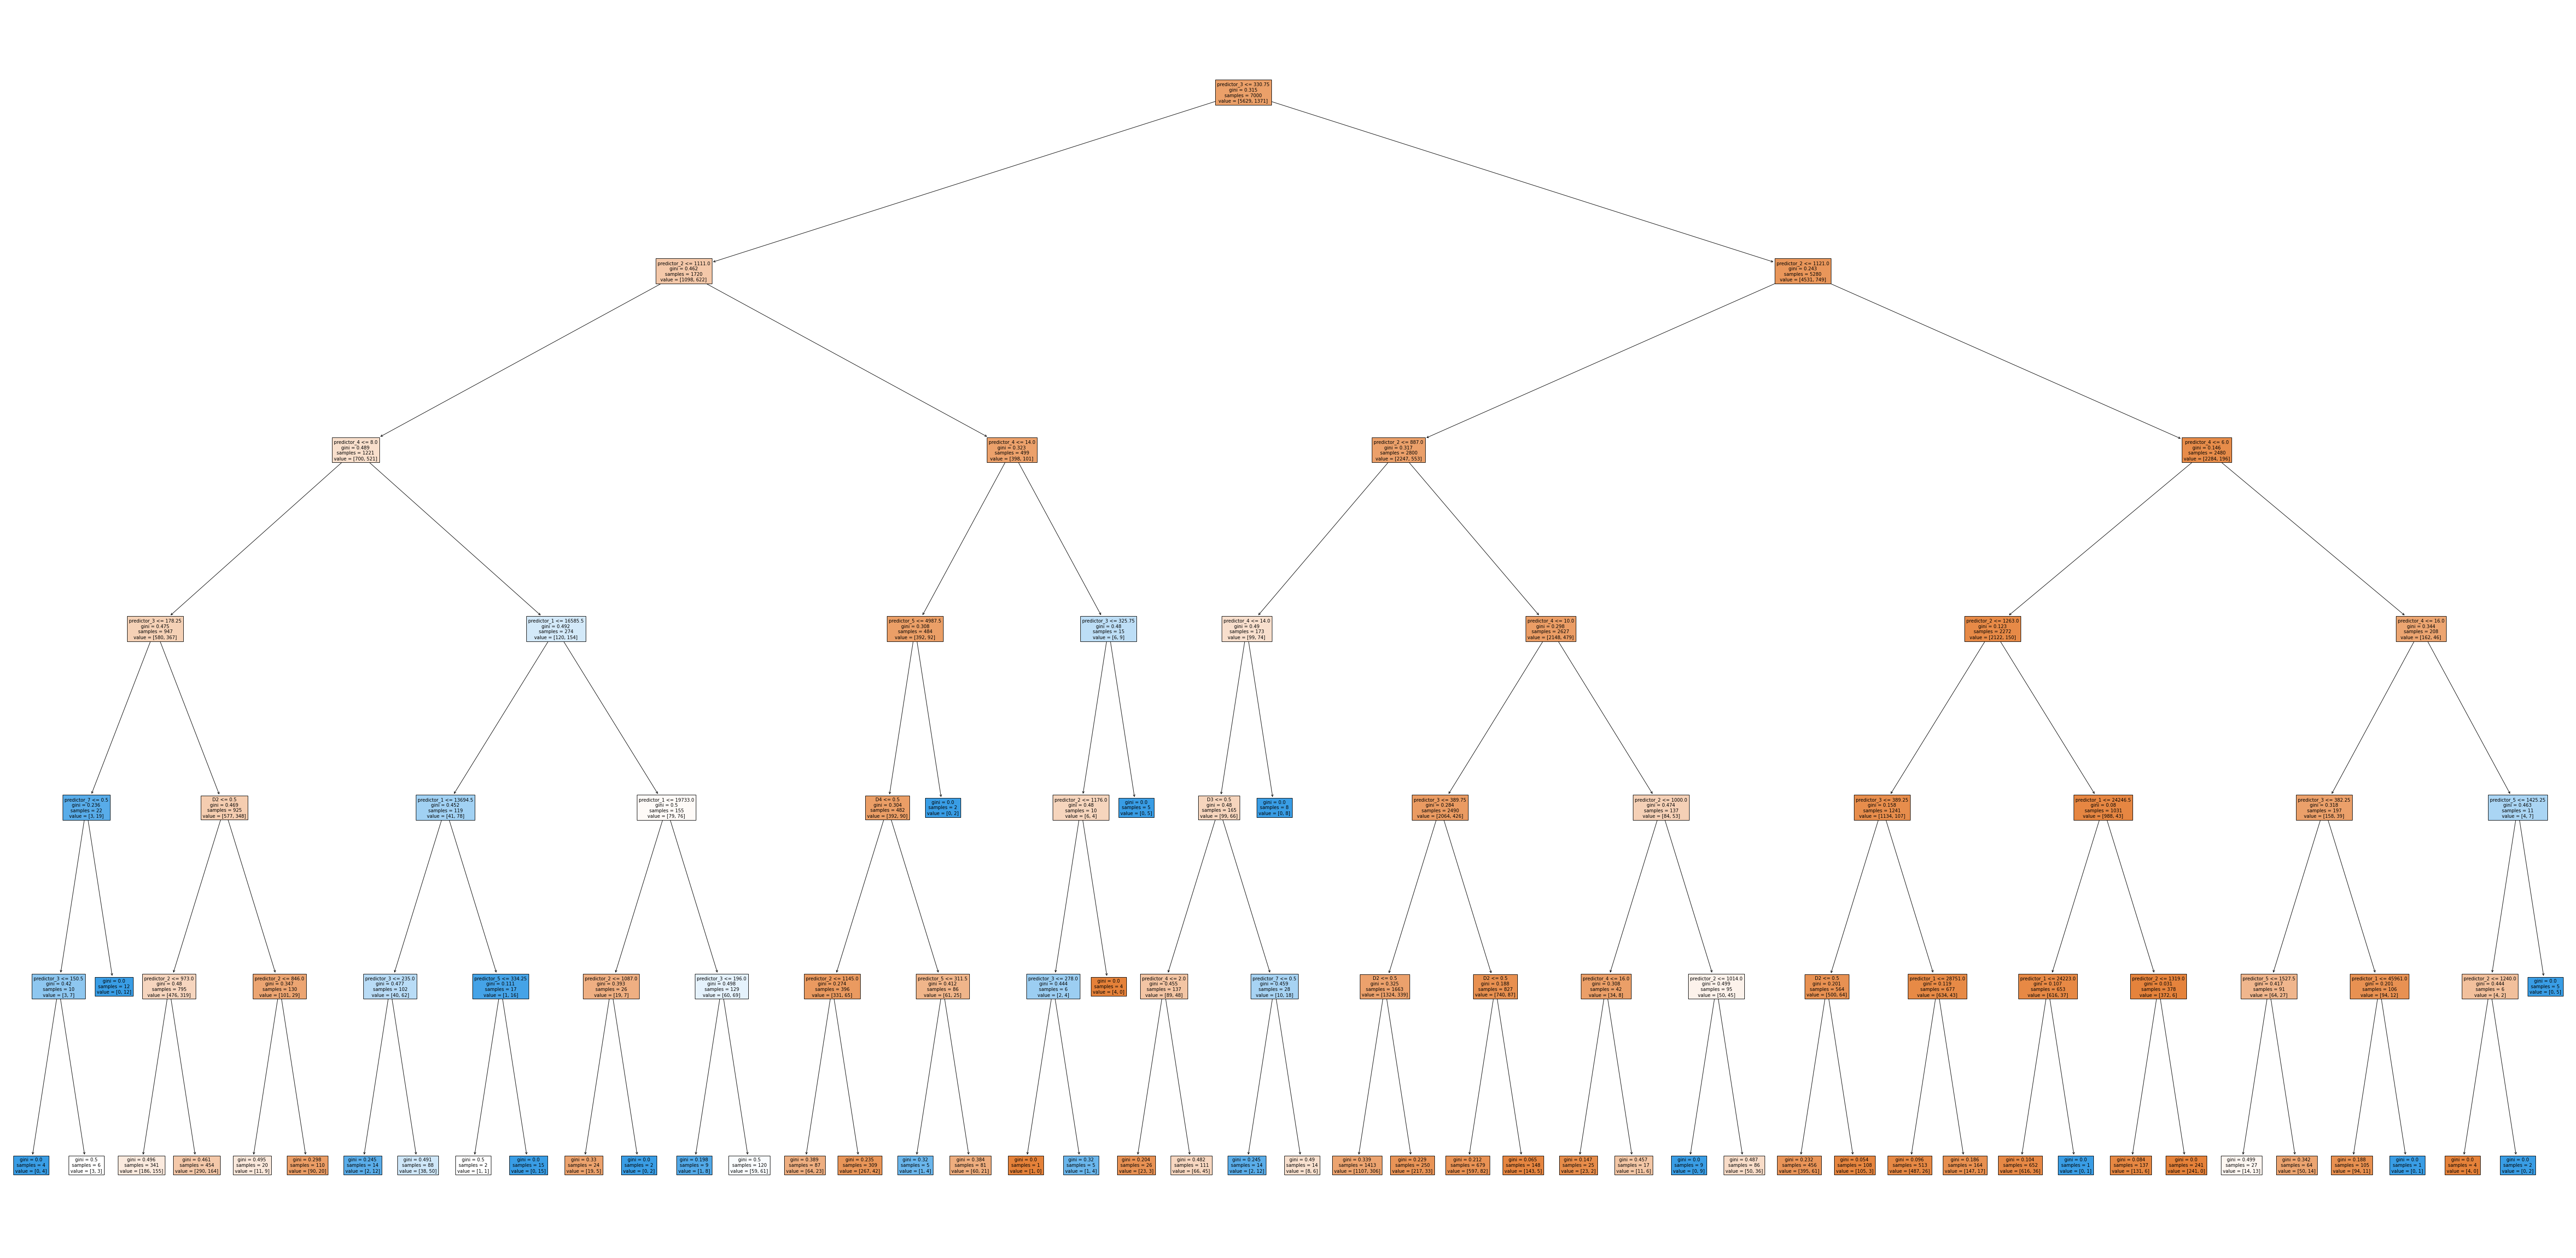

In [ ]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf_6, fontsize=10, feature_names=list(X), filled=True);

#3 предиктора

In [ ]:
X = prepared_data[['predictor_2', 'predictor_3', 'predictor_4']]
y = prepared_data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_rf = RandomForestClassifier()

In [ ]:
params = {'n_estimators' : [10, 20, 30], 'max_depth' : [4, 5, 6, 7,8]}

In [ ]:
grid_search_cv_clf_rf = GridSearchCV(clf_rf, params, cv = 5)

In [ ]:
grid_search_cv_clf_rf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search_cv_clf_rf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [ ]:
best_clf_rf = grid_search_cv_clf_rf.best_estimator_

In [ ]:
best_clf_rf.score(X_test, y_test)

0.818

#Важность фичей

In [ ]:
feature_importance = best_clf_rf.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'features' : list(X_train3),
                                      'feature_importance' : feature_importance})

In [ ]:
feature_importance_df.sort_values('feature_importance', ascending = False)

,features,feature_importance
1,predictor_3,0.434065
0,predictor_2,0.332650
2,predictor_4,0.233286


#Пайплайн/Трансформатор

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
change_type = FunctionTransformer(data.predictor_7.astype('category').cat.codes)

In [ ]:
pipeline = Pipeline([('logReg', LogisticRegression())])